### Training a Random Forest Algorithm Model

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

#Model Algorithms
from sklearn.linear_model import LogisticRegression

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


#SMOTE for rare classes in Offense Category
from imblearn.over_sampling import SMOTE

#Visualization
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt


df = pd.read_csv("./Datasets/CT-Combined/combined_data.csv")

In [24]:
# Drop rare offense categories (< 50 rows)
classes = df['offense_category_name'].value_counts()
common_classes = classes[classes >= 100].index
df = df[df['offense_category_name'].isin(common_classes)]

##### One Hot Encoder for X

In [25]:
# Here, what I am doing is that I'm turning all features that aren't numerical into numerical format
# One hot encoder is best for nominal data where there's no ranks
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output= False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(df[['city', 'location_area']])

# X is the input features (what the model learns from)
numerical_features = df[['year', 'hour']]
X = pd.concat([numerical_features, ohetransform], axis = 1)

##### Label Encoder for y

In [26]:
le = LabelEncoder()
y = le.fit_transform(df["offense_category_name"])

##### Train Test Split for both X and y

In [27]:
#random_state is keeping the the result exact same everytime you run it, likes like a random_seed
#test_size is to give the model 20% of the dataset to test on
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, test_size=0.2, stratify=y)

In [28]:
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [29]:
print(X.shape, y.shape)

(366933, 143) (366933,)


##### Train the model on the data

In [30]:
model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    multi_class='ovr')

In [31]:
#Random Forest (46.51%):
model.fit(X_train, y_train) 

#model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# model.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[early_stopping(10)])

/opt/anaconda3/envs/nyc/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/nyc/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [32]:
y_prob = model.predict_proba(X_test)

# Calculate log loss
loss = log_loss(y_test, y_prob)
print(f"Log Loss: {loss:.4f}")

Log Loss: 1.6417


In [33]:
# Make predictions
y_pred = model.predict(X_test)

In [34]:
# Evaluate model
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 44.23%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.00      0.00      0.00       103
           2       0.38      0.62      0.47     13999
           3       0.28      0.01      0.02      2721
           4       0.42      0.02      0.03       894
           5       0.25      0.13      0.17     10194
           6       0.39      0.22      0.28      3749
           7       0.00      0.00      0.00       104
           8       0.00      0.00      0.00       135
           9       0.55      0.57      0.56      7036
          10       0.00      0.00      0.00        85
          11       0.00      0.00      0.00       171
          12       0.50      0.72      0.59     24295
          13       0.34      0.02      0.04      4746
          14       0.00      0.00      0.00       180
          15       0.00      0.00      0.00        24
          16       0.00      0.00      0

/opt/anaconda3/envs/nyc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/nyc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/nyc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Assuming a trained scikit-learn LogisticRegression model
coef = model.coef_

# For multiclass, coef_ is (n_classes, n_features). You can take average magnitude across classes.
if coef.shape[0] > 1:
    mean_abs_coef = np.mean(np.abs(coef), axis=0)
else:
    mean_abs_coef = np.abs(coef[0])

features_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': mean_abs_coef
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(features_importance.head(10))


Top 10 Most Important Features:
                                              feature  importance
111                          location_area_Cyberspace    1.992404
121  location_area_Highway/Road/Alley/Street/Sidewalk    1.265988
103               location_area_Bank/Savings and Loan    1.129967
113           location_area_Department/Discount Store    1.118148
136         location_area_School-Elementary/Secondary    0.947922
130             location_area_Parking/Drop Lot/Garage    0.933287
120                 location_area_Grocery/Supermarket    0.878166
132                      location_area_Residence/Home    0.864244
36                                      city_Hartford    0.762863
128                       location_area_Other/Unknown    0.731447


In [36]:
print("\nClass Labels:")
for i, class_name in enumerate(le.classes_):
    print(f"{i}: {class_name}")


Class Labels:
0: Animal Cruelty
1: Arson
2: Assault Offenses
3: Burglary/Breaking & Entering
4: Counterfeiting/Forgery
5: Destruction/Damage/Vandalism of Property
6: Drug/Narcotic Offenses
7: Embezzlement
8: Extortion/Blackmail
9: Fraud Offenses
10: Homicide Offenses
11: Kidnapping/Abduction
12: Larceny/Theft Offenses
13: Motor Vehicle Theft
14: Pornography/Obscene Material
15: Prostitution Offenses
16: Robbery
17: Sex Offenses
18: Sex Offenses, Non-forcible
19: Stolen Property Offenses
20: Weapon Law Violations


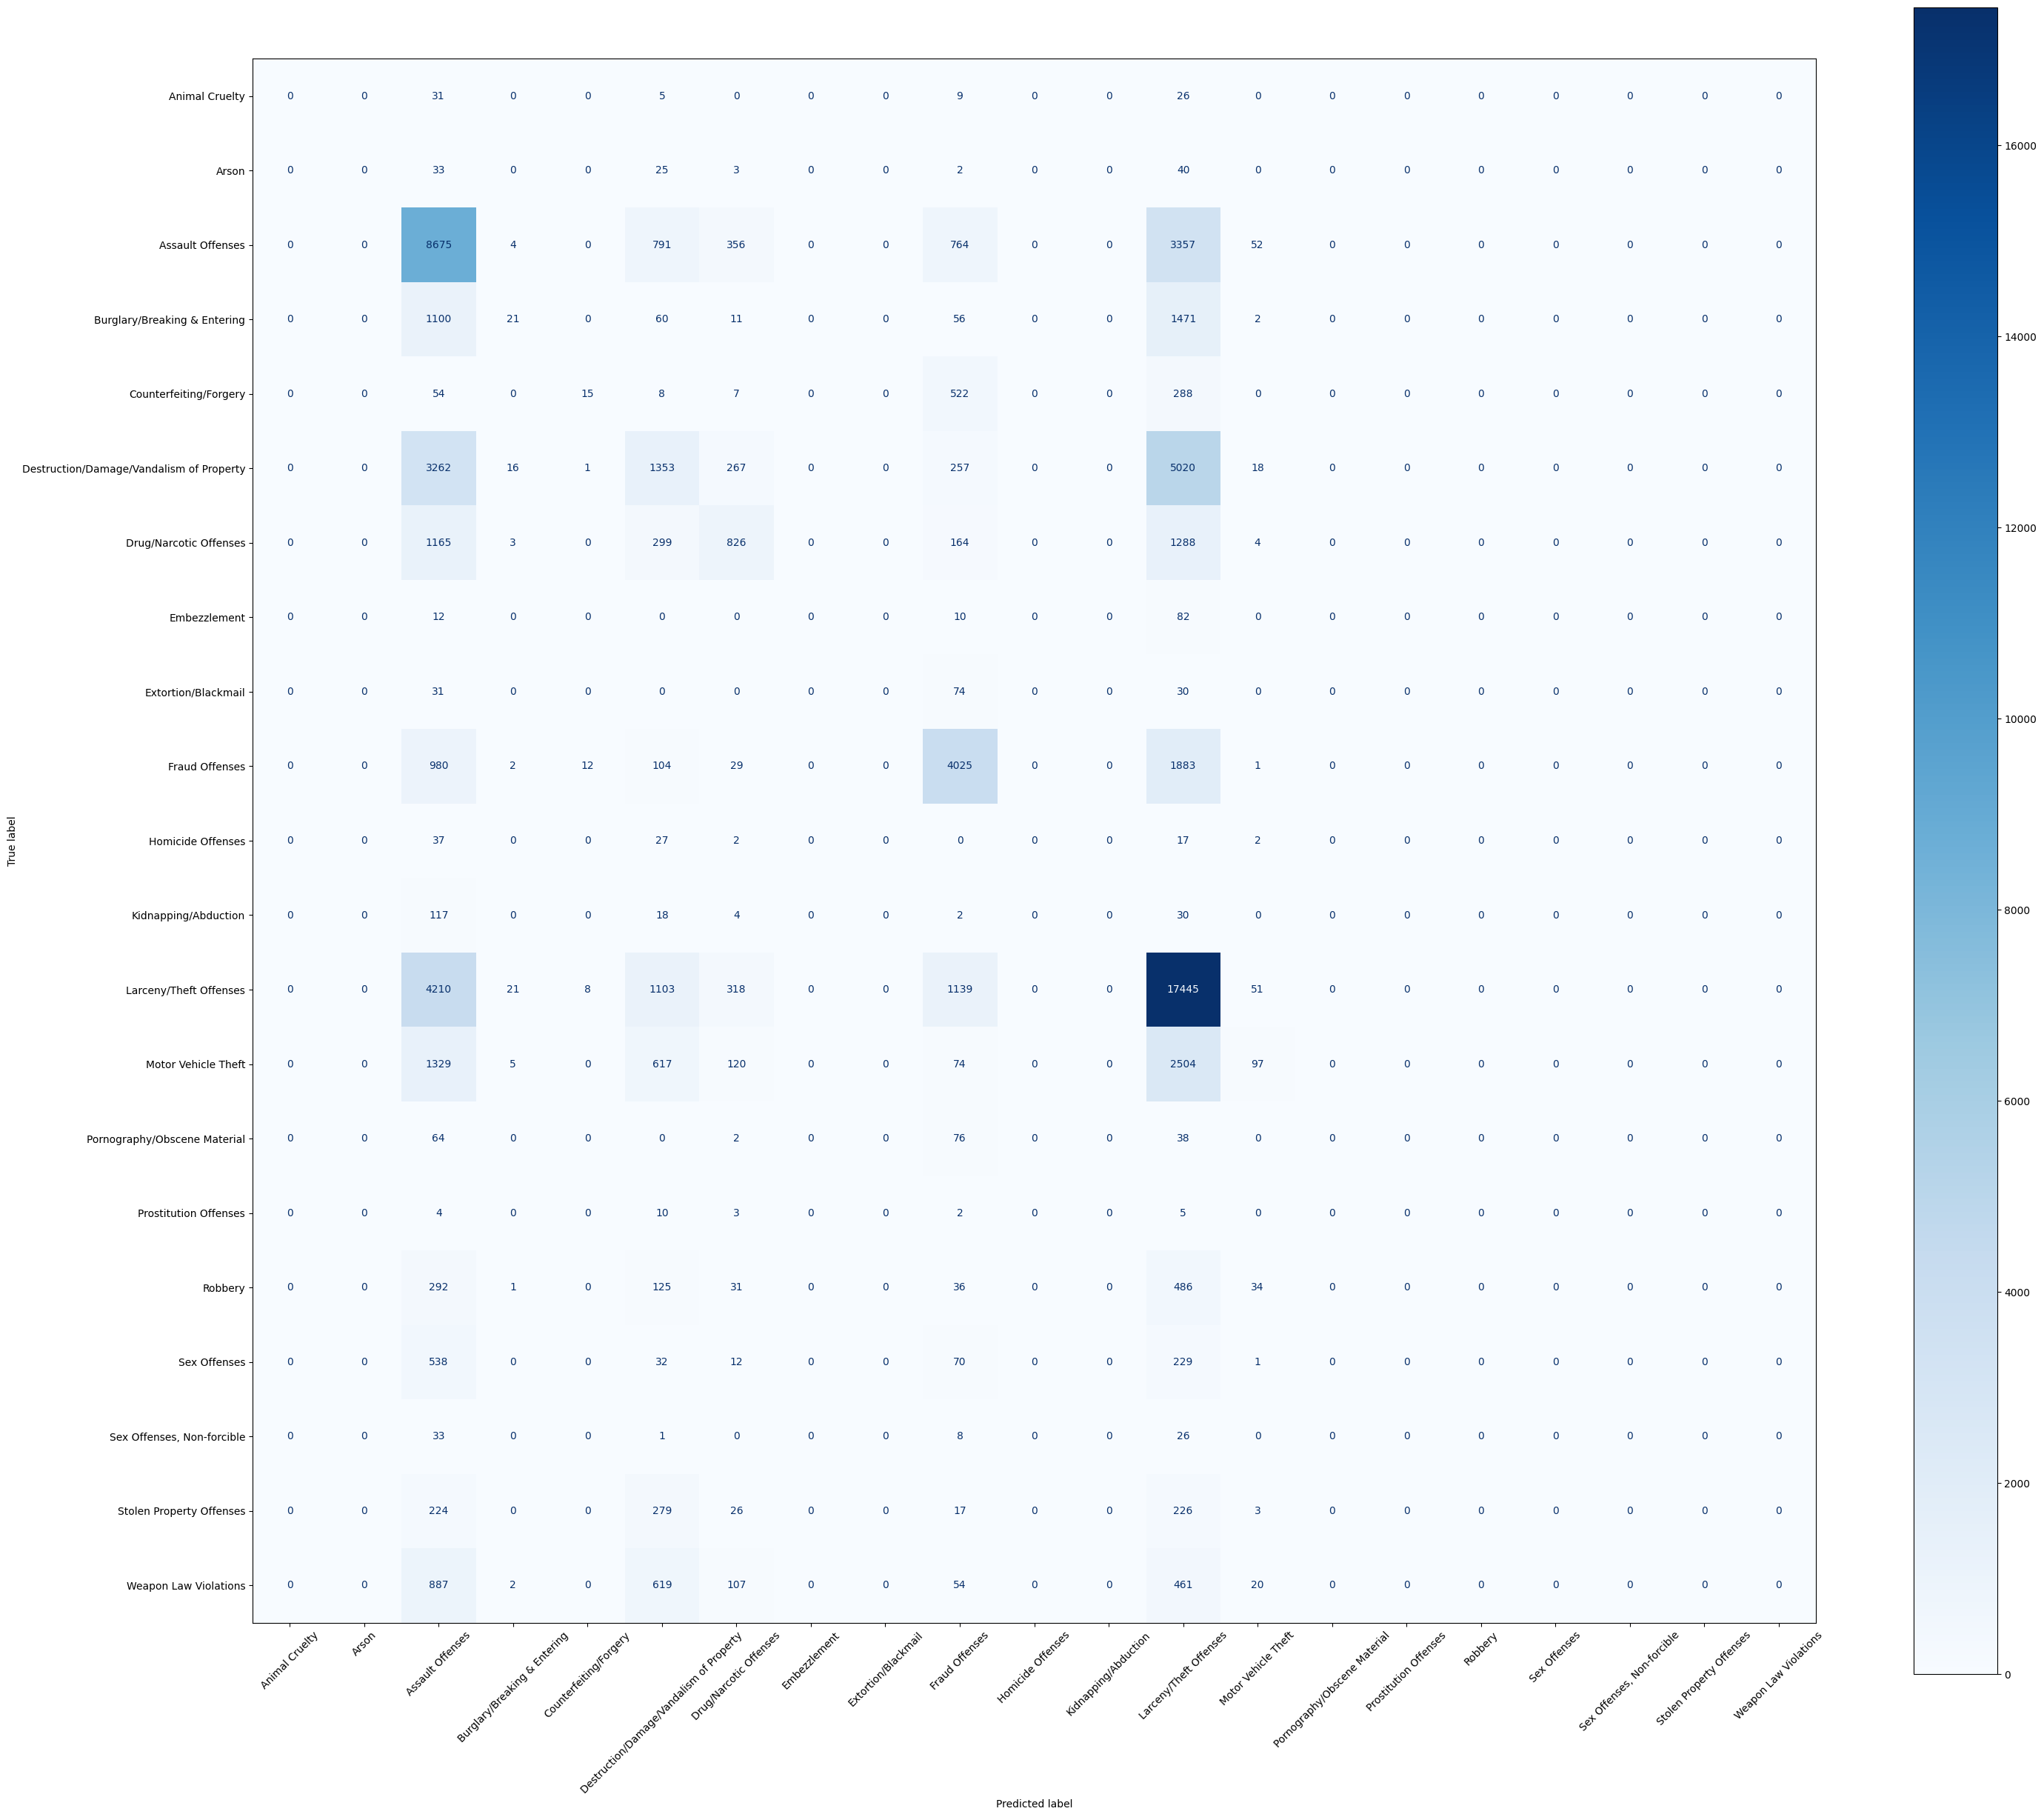

In [37]:
# Compute the matrix
cm = confusion_matrix(y_test, y_pred)

# Plot with larger figure
fig, ax = plt.subplots(figsize=(30, 25))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/nyc/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/nyc/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

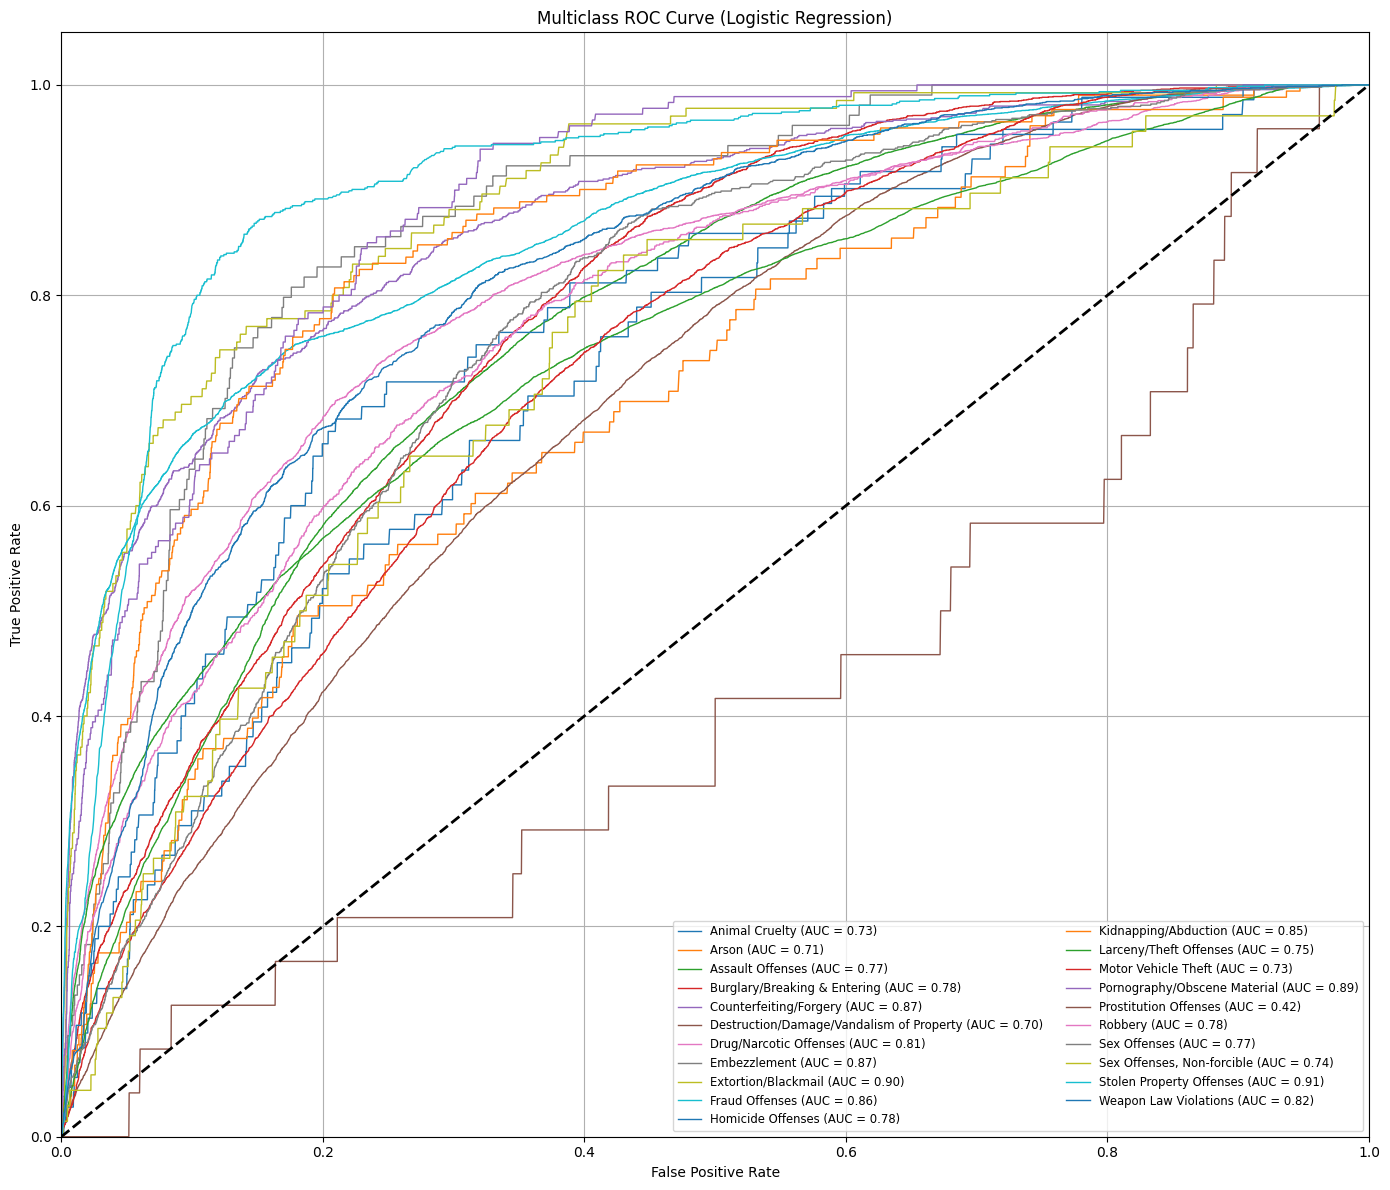

In [38]:
# Binarize the target
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Train/test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(
    X, y_bin, test_size=0.2, random_state=42, stratify=y
)

# One-vs-Rest Logistic Regression
clf = OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='lbfgs'))
clf.fit(X_train, y_train_bin)
y_score = clf.predict_proba(X_test)

# Compute ROC curve and AUC
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(14, 12))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1, label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Logistic Regression)')
plt.legend(loc='lower right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()